<a href="https://colab.research.google.com/github/ArohiniAshokan/sales_regression/blob/main/Decision_tree_Advertisement_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accessing the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking missing values

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Correlation

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

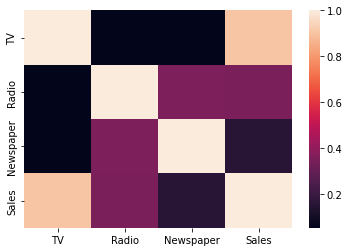

In [ ]:
sns.heatmap(df.corr())

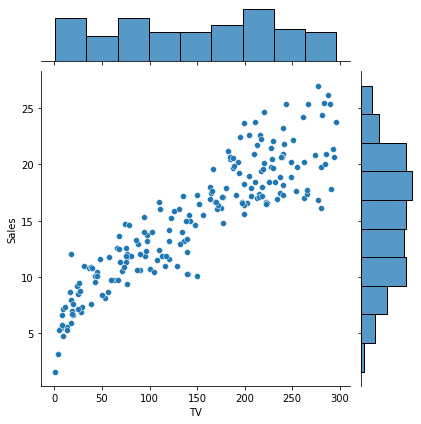

In [ ]:
sns.jointplot(x='TV',y='Sales',data=df)

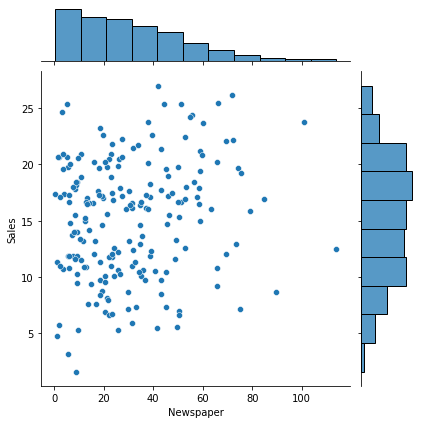

In [ ]:
sns.jointplot(x='Newspaper',y='Sales',data=df)

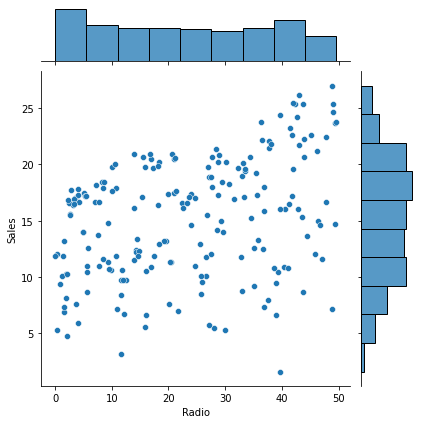

In [ ]:
sns.jointplot(x='Radio',y='Sales',data=df)

<Axes: xlabel='TV', ylabel='Sales'>

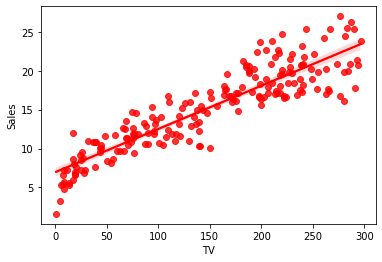

In [ ]:
sns.regplot(x='TV',y='Sales',data=df,color='r')

<Axes: xlabel='Radio', ylabel='Sales'>

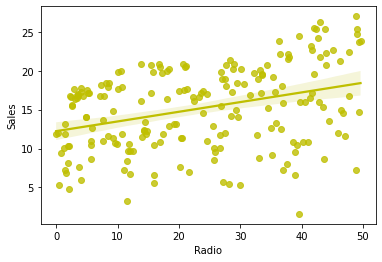

In [ ]:
sns.regplot(x='Radio',y='Sales',data=df,color='y')

<Axes: xlabel='Newspaper', ylabel='Sales'>

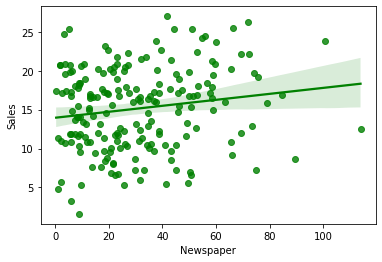

In [ ]:
sns.regplot(x='Newspaper',y='Sales',data=df,color='g')

splitting to input(x) and output(y)

In [ ]:
x=df.drop(['Sales'],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

Model creation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.5, 23.8, 19.6,  5.6, 23.8, 15.3, 22.6,  9.6, 17. , 17.1,  8.8,
        9.7, 16.7,  1.6, 12.6, 17.9,  5.6, 17.3, 11.9, 20.9, 19.8, 15.3,
       10.8, 22.1,  9.7,  9.7, 22.6, 13.2, 11.9,  4.8, 16.4, 13.2, 23.8,
       12. , 20.1, 20.9, 10.4, 19.8, 13.2,  6.7, 12.6, 17.6, 10.1,  9.6,
       17. ,  9.6, 12.3, 10.3, 13.2, 14. , 13.6, 17.9,  5.6,  5.6, 11.9,
       13.2, 13.2, 26.2,  6.6, 16.4])

Performance evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error
print('MAE is', mean_absolute_error(y_pred,y_test))
print('MAE % is',mean_absolute_percentage_error(y_test,y_pred))

MAE is 1.3566666666666665
MAE % is 0.12382555253599911


In [ ]:
print('r2_score is',r2_score(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))

r2_score is 0.8960759805878225
MSE is 2.9073333333333333


In [ ]:
a=mean_squared_error(y_test,y_pred)
print('RMSE is',np.sqrt(a))

RMSE is 1.705090417934877
